Nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges in the graph: [(0, 2), (0, 4), (0, 5), (0, 7), (1, 3), (1, 5), (1, 8), (2, 6), (3, 5), (3, 6), (3, 7), (4, 6), (5, 6), (6, 9)]
Maximum Independent Set: {2, 3, 4, 8, 9}
Size of Maximum Independent Set: 5
Is the set independent? True


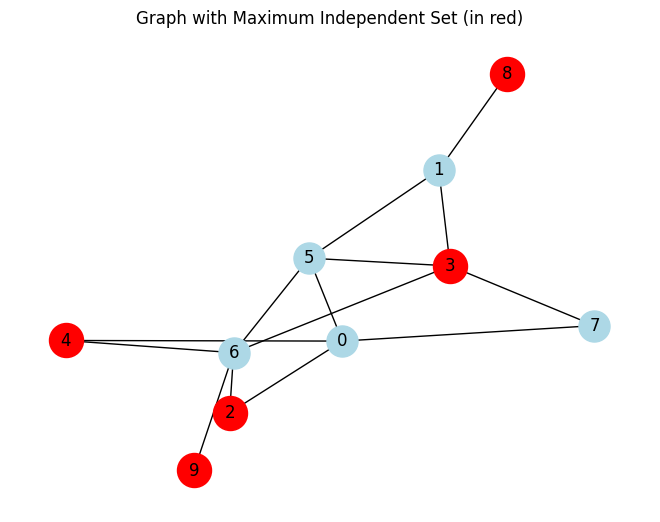

In [13]:
import networkx as nx
import random

def mis(G):
    if not G.nodes():
        return set()
    
    # Case 1: Maximum degree ≤ 2
    if max(dict(G.degree()).values(), default=0) <= 2:
        return set(nx.maximal_independent_set(G))
    
    # Case 2: Vertex with degree 1 exists
    degree_1_nodes = [v for v, d in G.degree() if d == 1]
    if degree_1_nodes:
        v = degree_1_nodes[0]
        neighbors = set(G.neighbors(v))
        G_new = G.copy()
        G_new.remove_nodes_from([v] + list(neighbors))
        return {v} | mis(G_new)
    
    # Case 3: Graph is not connected
    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        return set().union(*(mis(G.subgraph(c)) for c in components))
    
    # Case 4: General case
    v = max(G.degree(), key=lambda x: x[1])[0]
    G_without_v = G.copy()
    G_without_v.remove_node(v)
    set1 = mis(G_without_v)
    
    neighbors = set(G.neighbors(v))
    G_with_v = G.copy()
    G_with_v.remove_nodes_from(neighbors | {v})
    set2 = {v} | mis(G_with_v)
    
    return max(set1, set2, key=len)

def generate_random_graph(n, p):
    """Generate a random graph with n nodes and edge probability p."""
    return nx.erdos_renyi_graph(n, p)

# Example usage
if __name__ == "__main__":
    # Generate a random graph
    n = 10  # number of nodes
    p = 0.3  # probability of edge creation
    G = generate_random_graph(n, p)
    
    # Find the maximum independent set
    max_independent_set = mis(G)
    
    print(f"Nodes in the graph: {G.nodes()}")
    print(f"Edges in the graph: {G.edges()}")
    print(f"Maximum Independent Set: {max_independent_set}")
    print(f"Size of Maximum Independent Set: {len(max_independent_set)}")
    
    # Verify that the set is indeed independent
    is_independent = all(not G.has_edge(u, v) for u in max_independent_set for v in max_independent_set if u != v)
    print(f"Is the set independent? {is_independent}")

    #Optional: Visualize the graph
    #Uncomment the following lines if you have matplotlib installed
    import matplotlib.pyplot as plt
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=max_independent_set, node_color='red', node_size=600)
    plt.title("Graph with Maximum Independent Set (in red)")
    plt.show()

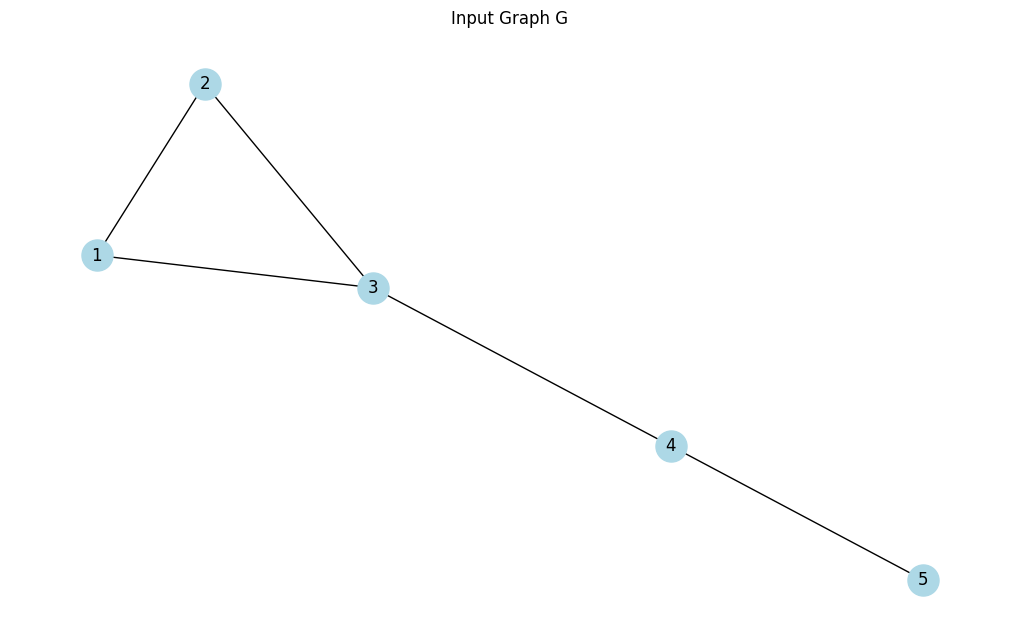

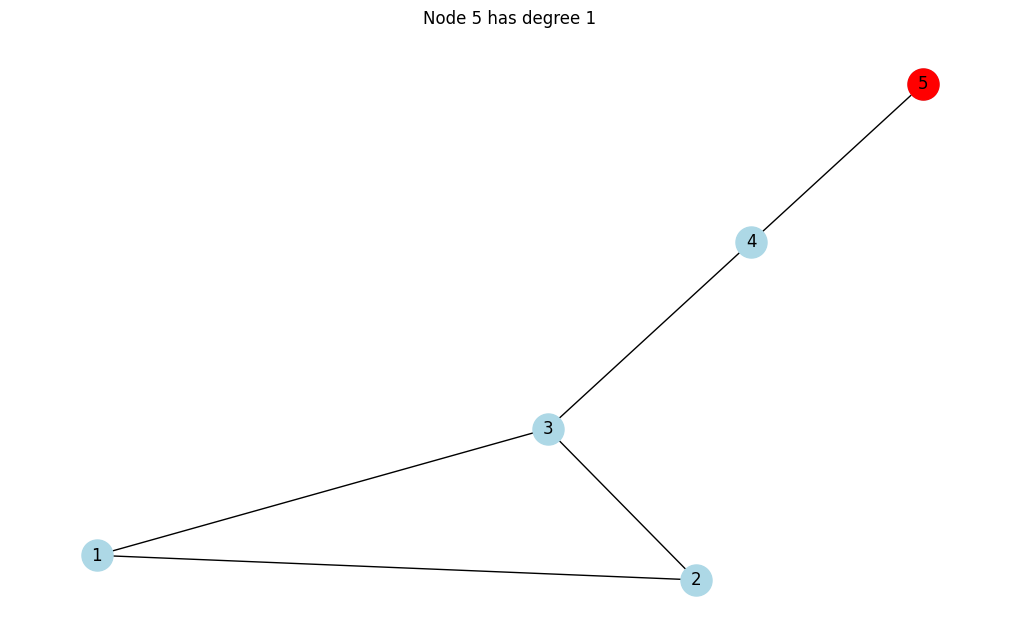

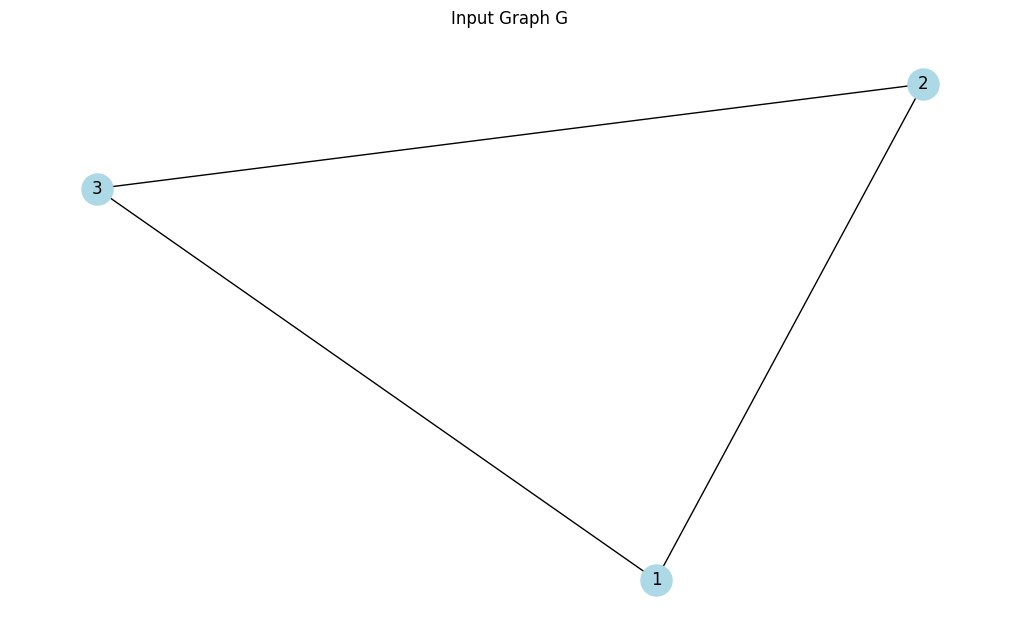

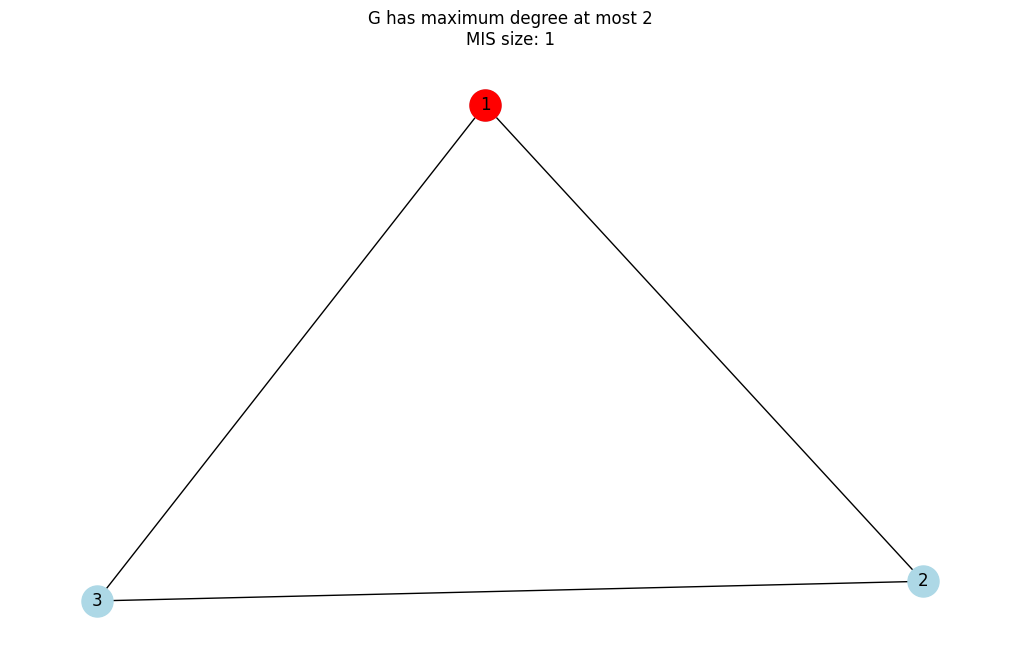

Size of maximum independent set: 2


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def mis(G):
    def visualize_step(G, title, selected_nodes=None):
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
        if selected_nodes:
            nx.draw_networkx_nodes(G, pos, nodelist=selected_nodes, node_color='red', node_size=500)
        plt.title(title)
        plt.show()

    def find_mis_degree2(G):
        mis = set()
        visited = set()
        for node in G.nodes():
            if node not in visited:
                mis.add(node)
                visited.add(node)
                visited.update(G.neighbors(node))
        return mis

    visualize_step(G, "Input Graph G")

    if max(dict(G.degree()).values()) <= 2:
        mis_set = find_mis_degree2(G)
        visualize_step(G, f"G has maximum degree at most 2\nMIS size: {len(mis_set)}", mis_set)
        return len(mis_set)

    degree_one_nodes = [n for n, d in G.degree() if d == 1]
    if degree_one_nodes:
        v = degree_one_nodes[0]
        G_minus_N_v = G.copy()
        G_minus_N_v.remove_nodes_from(list(G.neighbors(v)) + [v])
        visualize_step(G, f"Node {v} has degree 1", [v])
        return 1 + mis(G_minus_N_v)

    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        G1 = G.subgraph(components[0])
        G_minus_G1 = G.copy()
        G_minus_G1.remove_nodes_from(components[0])
        visualize_step(G, "G is not connected", components[0])
        return mis(G1) + mis(G_minus_G1)

    max_degree_node = max(G.degree(), key=lambda x: x[1])[0]
    G_minus_N_v = G.copy()
    G_minus_N_v.remove_nodes_from(list(G.neighbors(max_degree_node)) + [max_degree_node])
    G_minus_v = G.copy()
    G_minus_v.remove_node(max_degree_node)
    
    visualize_step(G, f"Selected node {max_degree_node} with maximum degree", [max_degree_node])
    
    return max(1 + mis(G_minus_N_v), mis(G_minus_v))

# Example usage
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5)])
result = mis(G)
print(f"Size of maximum independent set: {result}")